# Import stuff

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
%%file tips_module.py
'''
Module with all custom-functions defined for this tips.csv exercise
'''

def top(df, n=5, col='tip_pct'):
    '''
    Gives top n rows using descending order.
    In other words: TOP n

    input:
    - df: dataframe
    - n: number of top elements
    - col: column used for ordering

    return:
    - dataframe sorted by col with head(n)
    '''
    return df.sort_values(by=col, ascending=False).head(n)



Overwriting tips_module.py


In [10]:
! pip install reload

     |████████████████████████████████| 85 kB 2.8 MB/s eta 0:00:011
  Created wheel for reload: filename=reload-0.9-py3-none-any.whl size=2879 sha256=8b1b5599c8b91bf1c2a81b4868031d9d3720a39ea7c1a98a31a0c7313ef23d47
  Stored in directory: /Users/tonialmagro/Library/Caches/pip/wheels/f1/a2/ff/3f7b4879e081247a0e1381fd6699e86e0732ca0c365be41634
Successfully built reload


In [11]:
from importlib import reload

In [77]:
reload(tps)

<module 'tips_module' from '/Users/tonialmagro/Documents/KSchool/Edicion_30/DS_python/class/tips_module.py'>

In [78]:
import tips_module as tps

In [79]:
tps.top2?

# Read the CSV

In [16]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1) Plot scatter of TIP vs TOTAL_BILL

In [42]:
df.plot.scatter?

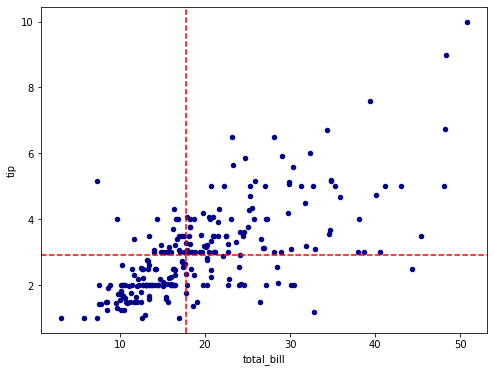

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
df.plot.scatter(x ='total_bill',
                y ='tip',
                c ='DarkBlue',
                ax = ax)
plt.axvline(df['total_bill'].median(),c='r',ls='dashed')
plt.axhline(df['tip'].median(),c='r',ls='dashed')
#plt.grid(True)

In [36]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [56]:
df['total_bill_person'] = df['total_bill']/df['size']

In [57]:
df.corr()

,total_bill,tip,size,total_bill_person
total_bill,1.000000,0.675734,0.598315,0.647497
tip,0.675734,1.000000,0.489299,0.347393
size,0.598315,0.489299,1.000000,-0.175412
total_bill_person,0.647497,0.347393,-0.175412,1.000000


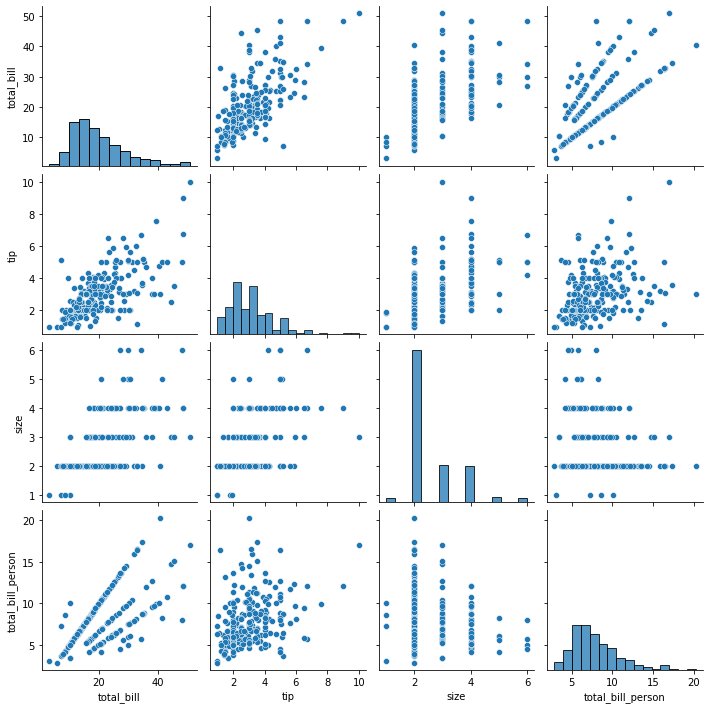

In [63]:
sns.pairplot(df)

### Top 5 total bills

In [68]:
tps.top(df,col='total_bill')

,total_bill,tip,sex,smoker,day,time,size,total_bill_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.936667
212,48.33,9.00,Male,No,Sat,Dinner,4,12.082500
59,48.27,6.73,Male,No,Sat,Dinner,4,12.067500
156,48.17,5.00,Male,No,Sun,Dinner,6,8.028333
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.116667


### 2) Who is more generous? (Smokers or Females?)

In [ ]:
top2 = top(d)

In [99]:
df.groupby('time').apply(tps.top,col='total_bill_person')

total_bill    tip     sex smoker   day    time  size  \
time                                                               
Dinner 184       40.55   3.00    Male    Yes   Sun  Dinner     2   
       179       34.63   3.55    Male    Yes   Sun  Dinner     2   
       170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       175       32.90   3.11    Male    Yes   Sun  Dinner     2   
       237       32.83   1.17    Male    Yes   Sat  Dinner     2   
Lunch  83        32.68   5.00    Male    Yes  Thur   Lunch     2   
       192       28.44   2.56    Male    Yes  Thur   Lunch     2   
       88        24.71   5.85    Male     No  Thur   Lunch     2   
       78        22.76   3.00    Male     No  Thur   Lunch     2   
       197       43.11   5.00  Female    Yes  Thur   Lunch     4   

            total_bill_person  
time                           
Dinner 184          20.275000  
       179          17.315000  
       170          16.936667  
       175          16.450000  
       237          16.415000  
Lunch  83           16.340000  
       192          14.220000  
       88           12.355000  
       78           11.380000  
       197          10.777500

In [103]:
for item in df.groupby('time'):
    print(item)

('Dinner',      total_bill   tip     sex smoker   day    time  size  total_bill_person
0         16.99  1.01  Female     No   Sun  Dinner     2           8.495000
1         10.34  1.66    Male     No   Sun  Dinner     3           3.446667
2         21.01  3.50    Male     No   Sun  Dinner     3           7.003333
3         23.68  3.31    Male     No   Sun  Dinner     2          11.840000
4         24.59  3.61  Female     No   Sun  Dinner     4           6.147500
..          ...   ...     ...    ...   ...     ...   ...                ...
239       29.03  5.92    Male     No   Sat  Dinner     3           9.676667
240       27.18  2.00  Female    Yes   Sat  Dinner     2          13.590000
241       22.67  2.00    Male    Yes   Sat  Dinner     2          11.335000
242       17.82  1.75    Male     No   Sat  Dinner     2           8.910000
243       18.78  3.00  Female     No  Thur  Dinner     2           9.390000

[176 rows x 8 columns])
('Lunch',      total_bill   tip     sex smoker   day

In [98]:
df.groupby('time').apply(lambda df: tps.top(df,col='total_bill_person'))

total_bill    tip     sex smoker   day    time  size  \
time                                                               
Dinner 184       40.55   3.00    Male    Yes   Sun  Dinner     2   
       179       34.63   3.55    Male    Yes   Sun  Dinner     2   
       170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       175       32.90   3.11    Male    Yes   Sun  Dinner     2   
       237       32.83   1.17    Male    Yes   Sat  Dinner     2   
Lunch  83        32.68   5.00    Male    Yes  Thur   Lunch     2   
       192       28.44   2.56    Male    Yes  Thur   Lunch     2   
       88        24.71   5.85    Male     No  Thur   Lunch     2   
       78        22.76   3.00    Male     No  Thur   Lunch     2   
       197       43.11   5.00  Female    Yes  Thur   Lunch     4   

            total_bill_person  
time                           
Dinner 184          20.275000  
       179          17.315000  
       170          16.936667  
       175          16.450000  
       237          16.415000  
Lunch  83           16.340000  
       192          14.220000  
       88           12.355000  
       78           11.380000  
       197          10.777500

In [115]:
df['tip_pct']=df['tip']/df['total_bill']

<AxesSubplot:xlabel='day', ylabel='tip_pct'>

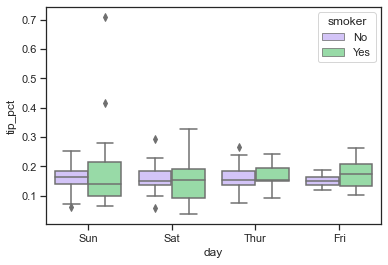

In [117]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="tip_pct",
            hue="smoker", palette=["m", "g"],
            data=df)
#sns.despine(offset=10, trim=True)

In [119]:
42*1.15

48.3

In [121]:
df['total_bill_plus_tip'] = df['total_bill']+df['tip']

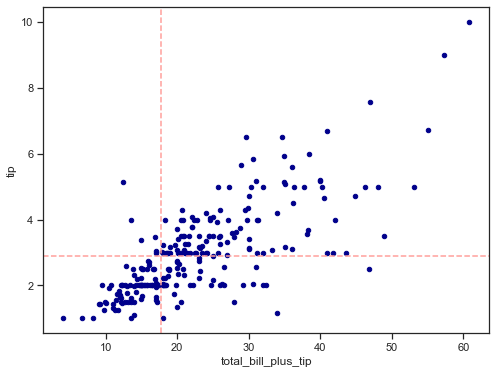

In [122]:
fig, ax = plt.subplots(figsize=(8,6))
df.plot.scatter(x ='total_bill_plus_tip',
                y ='tip',
                c ='DarkBlue',
                ax = ax)
plt.axvline(df['total_bill'].median(),c='r',ls='dashed')
plt.axhline(df['tip'].median(),c='r',ls='dashed')
#plt.grid(True)

In [123]:
df.corr()

,total_bill,tip,size,total_bill_person,tip_pct,total_bill_plus_tip
total_bill,1.000000,0.675734,0.598315,0.647497,-0.338624,0.994668
tip,0.675734,1.000000,0.489299,0.347393,0.342370,0.748151
size,0.598315,0.489299,1.000000,-0.175412,-0.142860,0.607016
total_bill_person,0.647497,0.347393,-0.175412,1.000000,-0.314156,0.631434
tip_pct,-0.338624,0.342370,-0.142860,-0.314156,1.000000,-0.256909
total_bill_plus_tip,0.994668,0.748151,0.607016,0.631434,-0.256909,1.000000


(array([ 1.,  0.,  1.,  0.,  1.,  3.,  4.,  6., 12.,  8., 11., 14.,  8.,
        13., 10., 13., 11., 15.,  8.,  6.,  9.,  9.,  7.,  8.,  5.,  3.,
         4.,  8.,  7.,  3.,  2.,  2.,  5.,  3.,  1.,  1.,  3.,  1.,  3.,
         3.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 4.07      ,  5.01566667,  5.96133333,  6.907     ,  7.85266667,
         8.79833333,  9.744     , 10.68966667, 11.63533333, 12.581     ,
        13.52666667, 14.47233333, 15.418     , 16.36366667, 17.30933333,
        18.255     , 19.20066667, 20.14633333, 21.092     , 22.03766667,
        22.98333333, 23.929     , 24.87466667, 25.82033333, 26.766     ,
        27.71166667, 28.65733333, 29.603     , 30.54866667, 31.49433333,
        32.44      , 33.38566667, 34.33133333, 35.277     , 36.22266667,
        37.16833333, 38.114     , 39.05966667, 40.00533333, 40.951     ,
        41.89666667, 42.84233333, 43.788     , 44.73366667, 45.67933333,
 

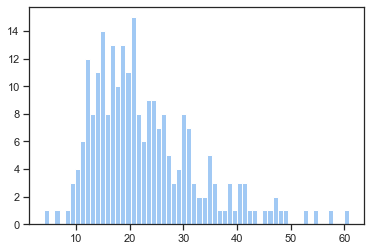

In [125]:
plt.hist(df['total_bill_plus_tip'],bins=60)

In [130]:
df['total_bill_round'] = df['total_bill_plus_tip']-df['total_bill_plus_tip']//5*5

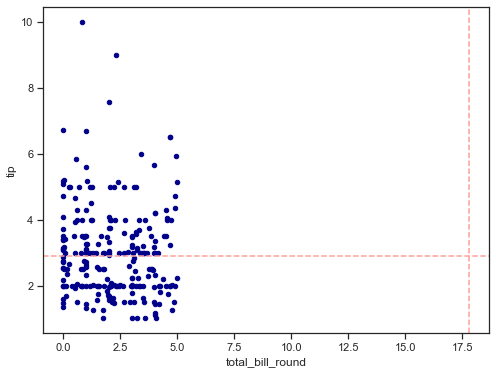

In [131]:
fig, ax = plt.subplots(figsize=(8,6))
df.plot.scatter(x ='total_bill_round',
                y ='tip',
                c ='DarkBlue',
                ax = ax)
plt.axvline(df['total_bill'].median(),c='r',ls='dashed')
plt.axhline(df['tip'].median(),c='r',ls='dashed')
#plt.grid(True)